In [29]:
%reset -f
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tqdm import tqdm

plt.style.use('seaborn')
%matplotlib inline

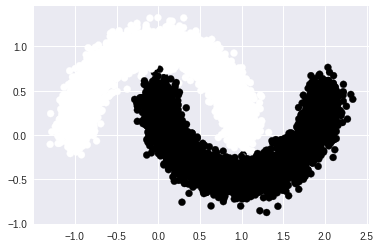

In [30]:
X,y = datasets.make_moons(n_samples=10000, 
                          shuffle=True, 
                          noise=0.1, 
                          random_state=1234)
Y = np.reshape(y, (len(y),1))

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [31]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.l1 = torch.nn.Linear(2, 3)
        self.l2 = torch.nn.Linear(3, 3)
        self.l3 = torch.nn.Linear(3, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        out3 = self.sigmoid(self.l3(out2))
        return out3   


In [32]:
model = NeuralNetwork()

In [33]:
inputs = torch.tensor(X, dtype=torch.float)
labels = torch.tensor(y, dtype=torch.float)

In [34]:
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [35]:
#store all the loss values
losses = []

In [36]:
for epoch in tqdm(range(10000)):
    y_pred = model(inputs)
    loss = criterion(y_pred, labels)
    losses.append(loss)
    if not epoch%500: print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  0%|          | 0/10000 [00:00<?, ?it/s]/home/joshhu/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([10000])) that is different to the input size (torch.Size([10000, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
  1%|          | 69/10000 [00:00<00:29, 338.76it/s]

0 0.716638445854187


  6%|▌         | 590/10000 [00:01<00:20, 448.63it/s]

500 0.0016325783217325807


 11%|█         | 1065/10000 [00:02<00:19, 457.59it/s]

1000 0.001288254396058619


 16%|█▌        | 1592/10000 [00:03<00:18, 461.83it/s]

1500 0.001219224650412798


 21%|██        | 2066/10000 [00:04<00:17, 463.33it/s]

2000 0.0011938340030610561


 26%|██▌       | 2591/10000 [00:05<00:15, 464.86it/s]

2500 0.001179361599497497


 31%|███       | 3069/10000 [00:06<00:14, 465.55it/s]

3000 0.0011681454489007592


 36%|███▌      | 3586/10000 [00:07<00:13, 465.65it/s]

3500 0.0011583218583837152


 41%|████      | 4056/10000 [00:08<00:12, 465.64it/s]

4000 0.001149616902694106


 46%|████▌     | 4574/10000 [00:09<00:11, 465.79it/s]

4500 0.0011419032234698534


 51%|█████     | 5091/10000 [00:10<00:10, 465.83it/s]

5000 0.0011350838467478752


 56%|█████▌    | 5562/10000 [00:11<00:09, 466.01it/s]

5500 0.0011289473623037338


 61%|██████    | 6079/10000 [00:13<00:08, 466.00it/s]

6000 0.0011231225216761231


 66%|██████▌   | 6550/10000 [00:14<00:07, 466.09it/s]

6500 0.0011238236911594868


 71%|███████   | 7073/10000 [00:15<00:06, 466.34it/s]

7000 0.0011116400128230453


 76%|███████▌  | 7595/10000 [00:16<00:05, 466.57it/s]

7500 0.0011054539354518056


 81%|████████  | 8073/10000 [00:17<00:04, 466.72it/s]

8000 0.001098250038921833


 86%|████████▌ | 8553/10000 [00:18<00:03, 467.07it/s]

8500 0.0010898526525124907


 91%|█████████ | 9081/10000 [00:19<00:01, 467.23it/s]

9000 0.0010827009100466967


 96%|█████████▌| 9561/10000 [00:20<00:00, 467.48it/s]

9500 0.0010694700758904219


100%|██████████| 10000/10000 [00:21<00:00, 467.73it/s]


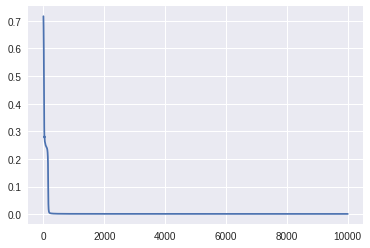

In [37]:
plt.plot(losses)

tensor([[1.]], grad_fn=<SigmoidBackward>)


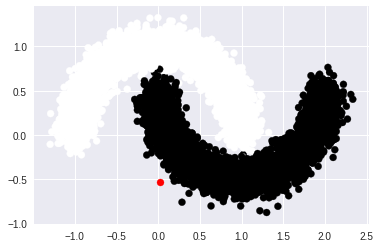

In [60]:
test = torch.randn(1,2, dtype=torch.float)
print(model.forward(test))
test2 = test.cpu().numpy()
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(test2[0][0], test2[0][1],c='red')
plt.show()